In [65]:
import random

# Number of files
total_files = 1222
file_indices = list(range(total_files))

# Shuffle the indices to ensure random distribution
random.shuffle(file_indices)

# Define the split point for 80% training, 20% testing
split_index = int(total_files * 0.8)
train_indices = file_indices[:split_index]
test_indices = file_indices[split_index:]

# Generate file paths for training and testing sets
image_paths_train = [f'data/image/image_{i}.jpg' for i in train_indices]
label_paths_train = [f'data/annotation/annotation_{i}.png' for i in train_indices]
image_paths_validation = [f'data/image/image_{i}.jpg' for i in test_indices]
label_paths_validation = [f'data/annotation/annotation_{i}.png' for i in test_indices]

# If you need to see the lists or do something with them, you can print them out or proceed with your logic
print("Training image paths:", image_paths_train)
print("Training label paths:", label_paths_train)
print("Testing image paths:", image_paths_validation)
print("Testing label paths:", label_paths_validation)


Training image paths: ['data/image/image_1013.jpg', 'data/image/image_501.jpg', 'data/image/image_193.jpg', 'data/image/image_1213.jpg', 'data/image/image_856.jpg', 'data/image/image_560.jpg', 'data/image/image_1151.jpg', 'data/image/image_779.jpg', 'data/image/image_189.jpg', 'data/image/image_224.jpg', 'data/image/image_55.jpg', 'data/image/image_281.jpg', 'data/image/image_480.jpg', 'data/image/image_347.jpg', 'data/image/image_405.jpg', 'data/image/image_411.jpg', 'data/image/image_23.jpg', 'data/image/image_277.jpg', 'data/image/image_1123.jpg', 'data/image/image_111.jpg', 'data/image/image_609.jpg', 'data/image/image_258.jpg', 'data/image/image_310.jpg', 'data/image/image_933.jpg', 'data/image/image_330.jpg', 'data/image/image_73.jpg', 'data/image/image_1119.jpg', 'data/image/image_79.jpg', 'data/image/image_940.jpg', 'data/image/image_235.jpg', 'data/image/image_216.jpg', 'data/image/image_1009.jpg', 'data/image/image_483.jpg', 'data/image/image_231.jpg', 'data/image/image_1031.

In [67]:
from datasets import Dataset, DatasetDict, Image, Features
import pandas as pd
from PIL import Image as PILImage
import numpy as np
import os
# image_paths_train = ["path/to/image_1.jpg/jpg", "path/to/image_2.jpg/jpg", ..., "path/to/image_n.jpg/jpg"]
# label_paths_train = ["path/to/annotation_1.png", "path/to/annotation_2.png", ..., "path/to/annotation_n.png"]

# image_paths_validation = [...]
# label_paths_validation = [...]

# def csv_to_image_array(csv_path):
#     # This function reads a CSV file and converts it into a PIL Image object representing your label image
#     # Each value in the CSV represents a pixel's class
#     df = pd.read_csv(csv_path, header=None)
#     label_array = df.values
#     # Convert array to a PIL Image; ensure dtype is np.uint8 to represent pixel values correctly
#     label_image = PILImage.fromarray(label_array)
#     return label_image

def create_dataset(image_paths, label_paths):
    
    dataset = Dataset.from_dict({"pixel_values": sorted(image_paths),
                                "label": sorted(label_paths)})
    dataset = dataset.cast_column("pixel_values", Image())
    dataset = dataset.cast_column("label", Image())
    return dataset


# step 1: create Dataset objects
train_dataset = create_dataset(image_paths_train, label_paths_train)
validation_dataset = create_dataset(image_paths_validation, label_paths_validation)

# step 2: create DatasetDict
dataset = DatasetDict({
     "train": train_dataset,
     "validation": validation_dataset,
     }
)

# step 3: push to Hub (assumes you have ran the huggingface-cli login command in a terminal/notebook)
# dataset.push_to_hub("your-name/dataset-repo")

# optionally, you can push to a private repo on the Hub
# dataset.push_to_hub("name of repo on the hub", private=True)

In [107]:
# create 'id2label'
id2label = {0: 'intactwall', 1: 'breakout', 2: 'faultzone', 3: 'wetspot', 4: 'unclassifycracks', 5: 'tectonictrace', 6: 'desiccation', 7: 'faultgauge'}
label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)

In [110]:
train_ds = dataset["train"]
test_ds = dataset["validation"]

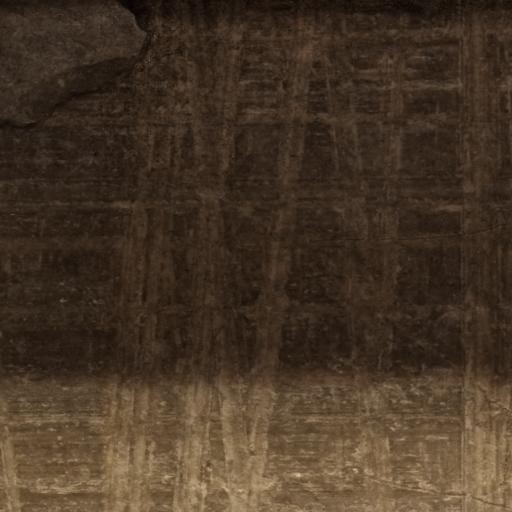

In [116]:
example = train_ds[1]
image = example['pixel_values']
image

In [117]:
import numpy as np

# load corresponding ground truth segmentation map, which includes a label per pixel
segmentation_map = np.array(train_ds[0]['label'])
segmentation_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [118]:
np.unique(segmentation_map)

array([0], dtype=uint8)

In [120]:
labels = [id2label[label] for label in np.unique(segmentation_map)]
print(labels)

['intactwall']


In [12]:
def color_palette():
    """Color palette that maps each class to RGB values.
    
    This one is actually taken from ADE20k.
    """
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

palette = color_palette()

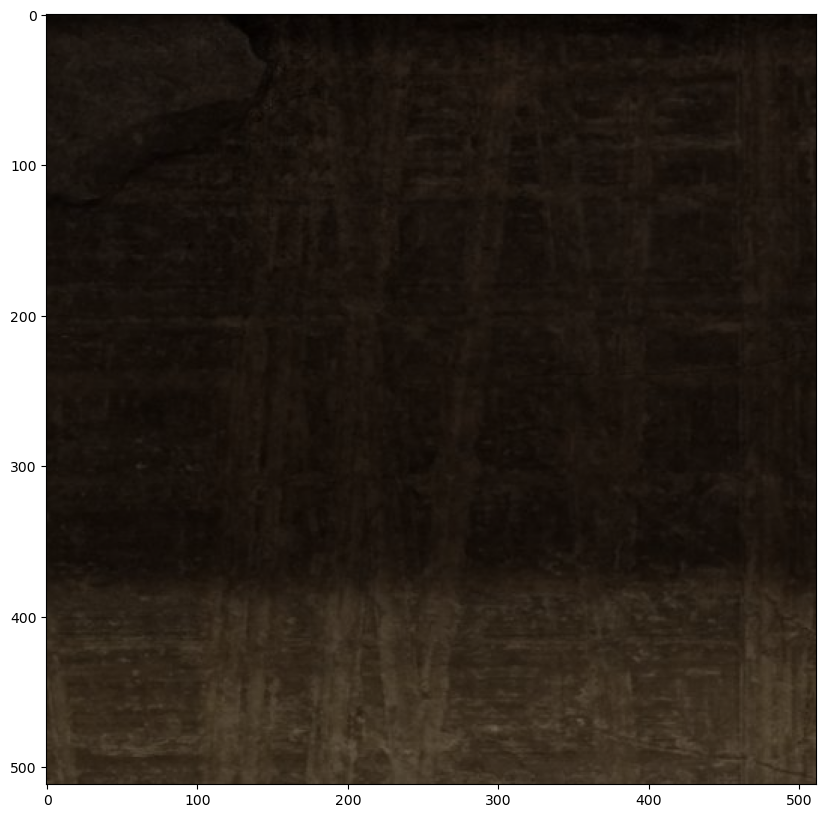

In [121]:
import numpy as np
import matplotlib.pyplot as plt

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map - 1 == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = np.array(image) * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [122]:
import numpy as np
from torch.utils.data import Dataset
from PIL import Image

class ImageSegmentationDataset(Dataset):
    """Image segmentation dataset."""

    def __init__(self, dataset, transform):
        """
        Args:
            dataset
        """
        self.dataset = dataset
        self.transform = transform
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        original_image = np.array(self.dataset[idx]['pixel_values'])
        original_segmentation_map = np.array(self.dataset[idx]['label'])
        
        transformed = self.transform(image=original_image, mask=original_segmentation_map)
        image, segmentation_map = transformed['image'], transformed['mask']

        # convert to C, H, W
        # image = Image.open().convert('RGB')
        image = image.transpose(2,0,1)

        return image, segmentation_map, original_image, original_segmentation_map

In [123]:
import albumentations as A

ADE_MEAN = np.array([123.675, 116.280, 103.530]) / 255
ADE_STD = np.array([58.395, 57.120, 57.375]) / 255

train_transform = A.Compose([
    # A.LongestMaxSize(max_size=1333),
    # A.RandomCrop(width=512, height=512),
    # A.HorizontalFlip(p=0.5),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
    A.Resize(width=512, height=512),
])

test_transform = A.Compose([
    A.Resize(width=512, height=512),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),

])

train_dataset = ImageSegmentationDataset(train_ds, transform=train_transform)
test_dataset = ImageSegmentationDataset(test_ds, transform=test_transform)
     

In [124]:
image, segmentation_map, _, _ = train_dataset[0]
print(image.shape)
print(segmentation_map.shape)

(3, 512, 512)
(512, 512)


In [125]:
np.unique(segmentation_map)

array([0], dtype=uint8)

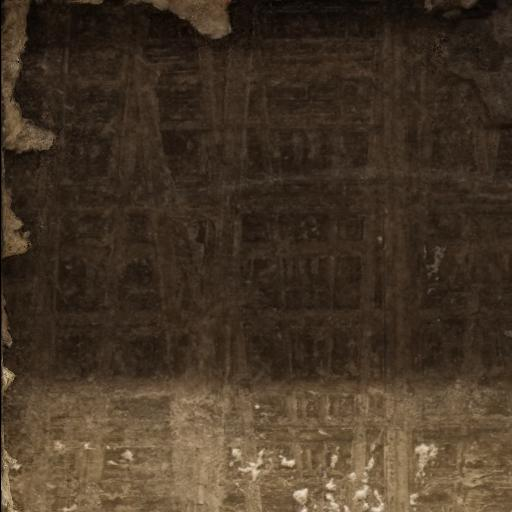

In [126]:
from PIL import Image

unnormalized_image = (image * np.array(ADE_STD)[:, None, None]) + np.array(ADE_MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [127]:
segmentation_map.shape

(512, 512)

In [128]:
labels = [id2label[label] for label in np.unique(segmentation_map)]
print(labels)

['intactwall']


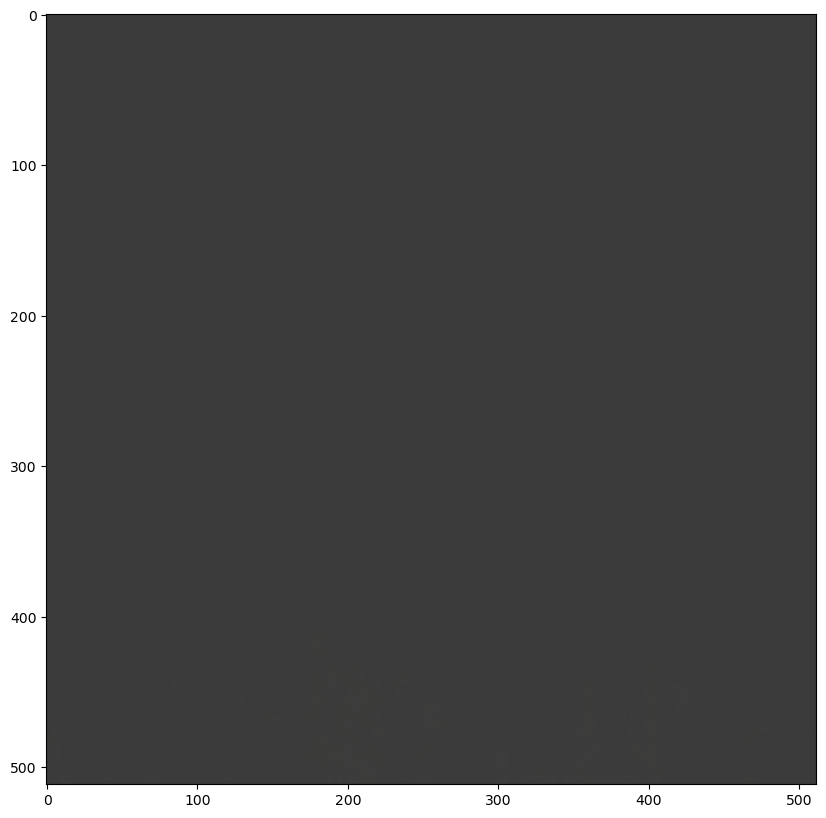

In [129]:
import numpy as np
import matplotlib.pyplot as plt

color_segmentation_map = np.zeros((segmentation_map.shape[0], segmentation_map.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    color_segmentation_map[segmentation_map == label, :] = color
# Convert to BGR
ground_truth_color_seg = color_segmentation_map[..., ::-1]

img = np.moveaxis(image, 0, -1) * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [130]:
from transformers import MaskFormerImageProcessor

# Create a preprocessor
preprocessor = MaskFormerImageProcessor(ignore_index=0, reduce_labels=False, do_resize=False, do_rescale=False, do_normalize=False)

/home/wangrush/.local/lib/python3.10/site-packages/transformers/models/maskformer/image_processing_maskformer.py:428: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  warnings.warn(


In [131]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    inputs = list(zip(*batch))
    print("here")
    images = inputs[0] 
    print(type(images))   
    segmentation_maps = inputs[1]
    print(np.unique(segmentation_map))   
    # this function pads the inputs to the same size,
    # and creates a pixel mask
    # actually padding isn't required here since we are cropping
    batch = preprocessor(
        images,
        segmentation_maps=segmentation_maps,
        return_tensors="pt",
    )

    batch["original_images"] = inputs[2]
    print("original_images")
    batch["original_segmentation_maps"] = inputs[3]
    print("original_segmentation_maps")
    
    return batch

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)

In [132]:
import torch

batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,v[0].shape)

here
<class 'tuple'>
[0]
original_images
original_segmentation_maps
pixel_values torch.Size([2, 3, 512, 512])
pixel_mask torch.Size([2, 512, 512])
mask_labels torch.Size([1, 512, 512])
class_labels torch.Size([1])
original_images (512, 512, 3)
original_segmentation_maps (512, 512)


In [133]:
pixel_values = batch["pixel_values"][0].numpy()
pixel_values.shape

(3, 512, 512)

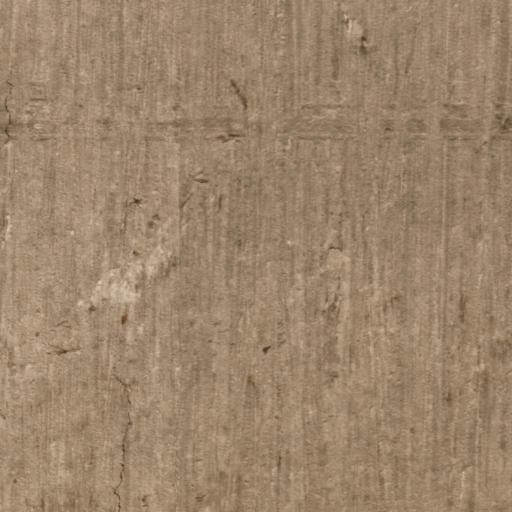

In [134]:
unnormalized_image = (pixel_values * np.array(ADE_STD)[:, None, None]) + np.array(ADE_MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [137]:
batch["class_labels"]

[tensor([6]), tensor([1])]

In [139]:
labels = [id2label[label] for label in batch["class_labels"][0].tolist()]
print(labels)

['desiccation']


In [136]:
batch["mask_labels"][0].shape

torch.Size([1, 512, 512])

In [140]:
batch["mask_labels"]

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 0., 0.,  ..., 1., 1., 1.],
          [0., 0., 0.,  ..., 1., 1., 1.],
          [0., 0., 0.,  ..., 1., 1., 1.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]])]

In [105]:
def visualize_mask(labels, label_name):
  print("Label:", label_name)
  idx = labels.index(label_name)

  visual_mask = (batch["mask_labels"][0][idx].bool().numpy() * 255).astype(np.uint8)
  return Image.fromarray(visual_mask)

Label: desiccation


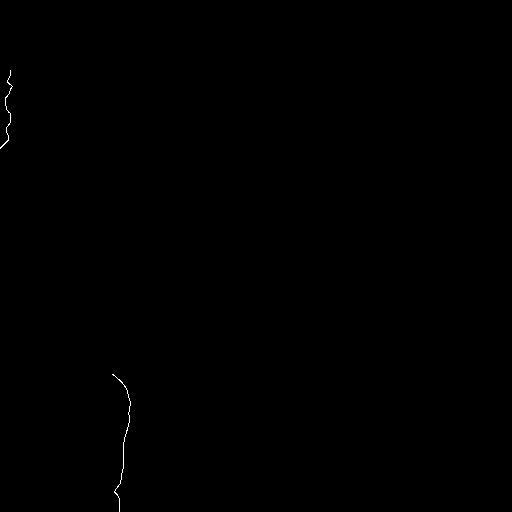

In [142]:
visualize_mask(labels, "desiccation")

In [45]:
from transformers import MaskFormerForInstanceSegmentation

# Replace the head of the pre-trained model
model = MaskFormerForInstanceSegmentation.from_pretrained("facebook/maskformer-swin-base-ade",
                                                          id2label=id2label,
                                                          ignore_mismatched_sizes=True)

Some weights of MaskFormerForInstanceSegmentation were not initialized from the model checkpoint at facebook/maskformer-swin-base-ade and are newly initialized because the shapes did not match:
- class_predictor.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([9, 256]) in the model instantiated
- class_predictor.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([9]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([9]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
outputs = model(batch["pixel_values"],
                class_labels=batch["class_labels"],
                mask_labels=batch["mask_labels"])

In [47]:
outputs.loss

tensor([3.1276], grad_fn=<AddBackward0>)

Train the model

In [ ]:
!pip install -q evaluate

In [48]:
import evaluate

metric = evaluate.load("mean_iou")

In [64]:
import torch
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

running_loss = 0.0
num_samples = 0
for epoch in range(100):
  print("Epoch:", epoch)
  model.train()
  for idx, batch in enumerate(tqdm(train_dataloader)):
      # Reset the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(
          pixel_values=batch["pixel_values"].to(device),
          mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
          class_labels=[labels.to(device) for labels in batch["class_labels"]],
      )

      # Backward propagation
      loss = outputs.loss
      loss.backward()

      batch_size = batch["pixel_values"].size(0)
      running_loss += loss.item()
      num_samples += batch_size

      if idx % 100 == 0:
        print("Loss:", running_loss/num_samples)

      # Optimization
      optimizer.step()

  model.eval()
  for idx, batch in enumerate(tqdm(test_dataloader)):
    if idx > 5:
      break

    pixel_values = batch["pixel_values"]
    
    # Forward pass
    with torch.no_grad():
      outputs = model(pixel_values=pixel_values.to(device))

    # get original images
    original_images = batch["original_images"]
    target_sizes = [(image.shape[0], image.shape[1]) for image in original_images]
    # predict segmentation maps
    predicted_segmentation_maps = preprocessor.post_process_semantic_segmentation(outputs,
                                                                                  target_sizes=target_sizes)

    # get ground truth segmentation maps
    ground_truth_segmentation_maps = batch["original_segmentation_maps"]

    metric.add_batch(references=ground_truth_segmentation_maps, predictions=predicted_segmentation_maps)
  
  # NOTE this metric outputs a dict that also includes the mIoU per category as keys
  # so if you're interested, feel free to print them as well
  print("Mean IoU:", metric.compute(num_labels = len(id2label), ignore_index = 0)['mean_iou'])

Epoch: 0


  0%|          | 0/489 [00:00<?, ?it/s]

here
<class 'tuple'>
<class 'tuple'>
original_images
original_segmentation_maps


  0%|          | 1/489 [00:00<03:17,  2.48it/s]

Loss: 1.9521558284759521
here
<class 'tuple'>
<class 'tuple'>
original_images
original_segmentation_maps


  0%|          | 2/489 [00:00<03:06,  2.61it/s]

here
<class 'tuple'>
<class 'tuple'>
original_images
original_segmentation_maps


  1%|          | 3/489 [00:01<03:06,  2.61it/s]

here
<class 'tuple'>
<class 'tuple'>
original_images
original_segmentation_maps


  1%|          | 4/489 [00:01<03:05,  2.61it/s]

here
<class 'tuple'>
<class 'tuple'>
original_images
original_segmentation_maps


  1%|          | 5/489 [00:01<03:07,  2.58it/s]

here
<class 'tuple'>
<class 'tuple'>


ValueError: need at least one array to stack

In [2]:
import numpy as np
import os
import csv
import random
# Number of files
total_files = 5103
file_indices = list(range(total_files))

# Shuffle the indices to ensure random distribution
random.shuffle(file_indices)

with open("file_indices.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    for index in file_indices:
        writer.writerow([index])


In [3]:
file_indices

[2152,
 2033,
 2414,
 4719,
 886,
 3149,
 1660,
 1805,
 4910,
 1828,
 2446,
 3493,
 649,
 4777,
 971,
 3287,
 692,
 1631,
 4820,
 1174,
 2272,
 1619,
 1428,
 789,
 3831,
 2058,
 4698,
 488,
 3871,
 994,
 673,
 4531,
 3965,
 4413,
 3811,
 2200,
 754,
 2206,
 4378,
 3127,
 2231,
 1787,
 671,
 4896,
 1550,
 1718,
 1449,
 4819,
 1150,
 1037,
 1591,
 4452,
 841,
 940,
 2444,
 4856,
 3686,
 4110,
 1397,
 1886,
 2919,
 1221,
 67,
 2107,
 1290,
 1394,
 3155,
 3357,
 2517,
 227,
 496,
 1395,
 3235,
 3288,
 4898,
 1165,
 2286,
 3330,
 1711,
 4825,
 2178,
 3930,
 442,
 372,
 894,
 2387,
 3067,
 4548,
 4592,
 1882,
 3820,
 4139,
 4154,
 1977,
 258,
 342,
 1140,
 421,
 2856,
 3662,
 4550,
 1925,
 3173,
 2717,
 905,
 4111,
 181,
 4358,
 2703,
 4598,
 852,
 2068,
 3398,
 957,
 4142,
 2119,
 4968,
 4606,
 3806,
 5016,
 827,
 631,
 2458,
 3070,
 1898,
 4112,
 2971,
 4789,
 4576,
 620,
 3001,
 1298,
 2751,
 606,
 4875,
 3567,
 3065,
 4089,
 1285,
 3037,
 2715,
 4032,
 3637,
 1736,
 3660,
 4196,
 1808,
 

In [4]:
shuffled_indices = []
with open("file_indices.csv", mode='r', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if row:  # making sure the row is not empty
            shuffled_indices.append(int(row[0]))  # Convert string back to integer

print("Shuffled indices have been loaded from the CSV file:")
print(shuffled_indices)

Shuffled indices have been loaded from the CSV file:
[2152, 2033, 2414, 4719, 886, 3149, 1660, 1805, 4910, 1828, 2446, 3493, 649, 4777, 971, 3287, 692, 1631, 4820, 1174, 2272, 1619, 1428, 789, 3831, 2058, 4698, 488, 3871, 994, 673, 4531, 3965, 4413, 3811, 2200, 754, 2206, 4378, 3127, 2231, 1787, 671, 4896, 1550, 1718, 1449, 4819, 1150, 1037, 1591, 4452, 841, 940, 2444, 4856, 3686, 4110, 1397, 1886, 2919, 1221, 67, 2107, 1290, 1394, 3155, 3357, 2517, 227, 496, 1395, 3235, 3288, 4898, 1165, 2286, 3330, 1711, 4825, 2178, 3930, 442, 372, 894, 2387, 3067, 4548, 4592, 1882, 3820, 4139, 4154, 1977, 258, 342, 1140, 421, 2856, 3662, 4550, 1925, 3173, 2717, 905, 4111, 181, 4358, 2703, 4598, 852, 2068, 3398, 957, 4142, 2119, 4968, 4606, 3806, 5016, 827, 631, 2458, 3070, 1898, 4112, 2971, 4789, 4576, 620, 3001, 1298, 2751, 606, 4875, 3567, 3065, 4089, 1285, 3037, 2715, 4032, 3637, 1736, 3660, 4196, 1808, 4059, 1213, 3900, 3144, 4984, 2382, 2439, 2502, 3929, 3206, 2125, 5019, 1762, 4607, 4347, 94, 

In [6]:
from createDataset import dataset
train_ds = dataset["train"]
test_ds = dataset["validation"]

In [2]:
import rasterio 
import numpy as np
with rasterio.open("data/refined/alllabel.tif") as img:
    data = img.read()
    print(np.unique(data))
    

[0. 1. 2. 3. 4. 5.]


In [3]:
allcount = (data == data).sum()

In [4]:
(data == 0).sum()
for i in range(6):
    count = (data == i).sum()
    print(i,"classnumber:", count, count/allcount)

0 classnumber: 238765416 0.6951774332891411
1 classnumber: 849106 0.0024722145257017013
2 classnumber: 2401392 0.006991772740157129
3 classnumber: 212117 0.0006175892392095543
4 classnumber: 76447632 0.2225810985741453
5 classnumber: 24784013 0.07215989163164528


In [2]:
# read radius layer
import rasterio 
import numpy as np
# from rasterio.plot import show
from rasterio.windows import Window

with rasterio.open("data/refined/RadiusCropped.tif") as radiusimg:
    radius_array = radiusimg.read()
    print(radius_array.shape)

with rasterio.open("data/CroppedImage.tif") as img:
    image_array = img.read()
    print(image_array.shape)

(1, 7091, 48436)
(3, 7091, 48436)


In [3]:
# Concatenate radius with original image
radius_array
print(np.amax(radius_array),np.amin(radius_array))

0.38926759362220764 0.2042904496192932


In [4]:
radius_array
normalizedData = (radius_array-np.min(radius_array))/(np.max(radius_array)-np.min(radius_array))

In [12]:
import matplotlib.pyplot as plt
rescale = normalizedData*255
plt.axis('off')
plt.imshow(rescale[0])

: 

In [13]:
import pandas as pd
df = pd.read_csv('csv.csv')
print(df)

        Wall time   Step   Value
0    1.713455e+09     23  0.9752
1    1.713455e+09     35  1.1383
2    1.713455e+09     41  0.8684
3    1.713455e+09     44  1.1011
4    1.713455e+09     72  0.7446
..            ...    ...     ...
995  1.713486e+09  17013  0.0114
996  1.713486e+09  17039  0.0193
997  1.713486e+09  17045  0.0271
998  1.713486e+09  17046  0.0171
999  1.713486e+09  17050  0.1965

[1000 rows x 3 columns]


Text(0.5, 1.0, 'Training Loss')

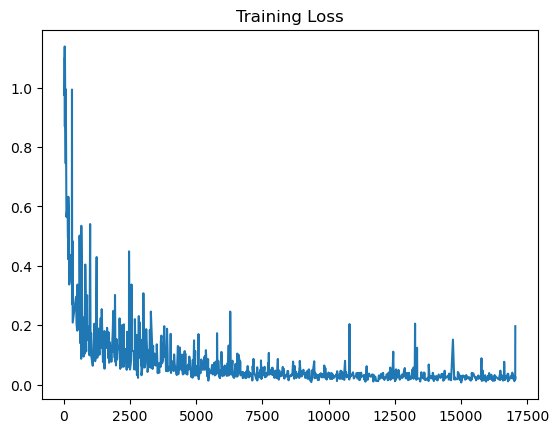

In [20]:
# np.array(df['Step'])
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.array(df['Step']),np.array(df['Value']))
plt.title("Training Loss")

Clip the large image into two parts: training area and testing area

In [15]:
import rasterio 
import numpy as np
# from rasterio.plot import show
from rasterio.windows import Window
import matplotlib.image as image
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
with rasterio.open("data/refined/alllabel.tif") as img2:
    # print(img2.shape)
    # window = Window(0,0,4000,4000)
    profile = img2.profile
    width =img2.width
    height = img2.height
    # data_cracks = img2.read()
    window_test = Window(0,0,width, int(height*0.2))
    window_train = Window(0,int(height*0.2),width, height - int(height*0.2))
    print(width, int(height*0.2))
    test_data = img2.read(window = window_test)
    profile.update(height = int(height*0.2))
    with rasterio.open('data/refined/test_alllabel.tif', 'w', **profile) as dst:
        dst.write(test_data.astype(rasterio.uint8))


48436 1418


In [17]:
with rasterio.open("data/refined/train_alllabel.tif") as img_test:
    test_data = img_test.read()
    print(test_data.shape, np.unique(test_data))

(1, 5673, 48436) [0. 1. 2. 3. 4. 5.]
